In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()

In [ ]:
from tensorflow.keras.layers import Dense
model.add(Dense(32, input_dim=10))

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 32)                352       
                                                                 
Total params: 352
Trainable params: 352
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=10))
model.add(Dense(5))
model.add(Dense(1))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                352       
                                                                 
 dense_9 (Dense)             (None, 5)                 165       
                                                                 
 dense_10 (Dense)            (None, 1)                 6         
                                                                 
Total params: 523
Trainable params: 523
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.datasets import mnist     # Библиотека с базой рукописных цифр
from tensorflow.keras.models import Sequential  # Подключение класса создания модели Sequential
from tensorflow.keras.layers import Dense       # Подключение класса Dense - полносвязный слой
from tensorflow.keras import utils              # Утилиты для подготовки данных
import numpy as np                              # Работа с массивами
import matplotlib.pyplot as plt                 # Отрисовка изображений

# Отрисовка изображений в ячейках ноутбука
%matplotlib inline 

Чтобы чему-то научить вашу нейронную сеть, понадобится набор данных для задачи, которую вы собираетесь решать. У вас это набор картинок, на которых изображены рукописные цифры от **0** до **9**. Следующей строкой кода вы скачаете эти данные:
* **x_train_org**, **y_train_org** – изображения для обучения нейронной сети;
* **x_test_org**, **y_test_org** – изображения для тестирования нейронной сети.


In [ ]:
# Загрузка из облака данных Mnist
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

Сейчас те самые картинки, с помощью которых вы будете обучать нейронную сеть, представляют из себя матрицы чисел, где каждое число – это значение яркости пиксела (от **0** до **255**). Таких изображений в вашем тренировочном наборе данных **60000**, и их размер **28** на **28** пикселов. Поэтому форма массива данных выглядит так:

In [ ]:
# Вывод формы данных для обучения
x_train_org.shape

(60000, 28, 28)

Убедитесь, что ваши данные действительно представляют собой картинки с числами.

Для этого выберите из массива **x_train_org** какую-нибудь матрицу чисел и отобразите ее в серой шкале:

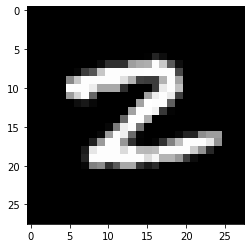

In [ ]:
# Номер картинки
n = 143

# Отрисовка картинки
plt.imshow(x_train_org[n], cmap='gray')

# Вывод n-й картинки
plt.show()

Видите изображение цифры **2**? 

Если же вы взглянете на массив **y_train_org**, который содержит в себе метки для картинок (то есть правильные значения распознаваемых цифр на картинках), то увидите, что этой картинке соответствует значение **2**:


In [ ]:
# Вывод метки класса для n-го изображения
print(y_train_org[n])

2


In [ ]:
# Изменение формы входных картинок с 28х28 на 784
# первая ось остается без изменения, остальные складываются в вектор
x_train = x_train_org.reshape(x_train_org.shape[0], -1)   
x_test = x_test_org.reshape(x_test_org.shape[0], -1)   

# Проверка результата
print(f'Форма обучающих данных: {x_train_org.shape} -> {x_train.shape}')
print(f'Форма  тестовых данных: {x_test_org.shape} -> {x_test.shape}')

Форма обучающих данных: (60000, 28, 28) -> (60000, 784)
Форма  тестовых данных: (10000, 28, 28) -> (10000, 784)


In [ ]:
# Нормализация входных картинок
# Преобразование x_train в тип float32 (числа с плавающей точкой) и нормализация
x_train = x_train.astype('float32') / 255.

# Преобразование x_test в тип float32 (числа с плавающей точкой) и нормализация
x_test = x_test.astype('float32') / 255.

Чтобы не указывать везде явно число классов, хорошим тоном будет назначить константу. Тогда, если вам захочется использовать удачную архитектуру модели на других данных с другим количеством классов, не придется менять это значение в каждом месте, где оно требуется:

In [ ]:
# Задание константы количества распознаваемых классов

CLASS_COUNT = 10

Преобразуйте выходные данные в векторы one hot encoding с помощью функции `to_categorical()` модуля **utils**:

In [ ]:
# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, CLASS_COUNT)
y_test = utils.to_categorical(y_test_org, CLASS_COUNT)

Теперь выходные данные для вашей нейронной сети выглядят следующим образом:

In [ ]:
# Вывод формы y_train
# 60 тысяч примеров, каждый длины 10 по числу классов
print(y_train.shape)

(60000, 10)


In [ ]:
# Вывод примера одного выходного вектора
print(y_train[0]) 

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Для сравнения - в оригинальных выходных данных все метки классов - просто одиночные числа:

In [ ]:
# Вывод формы массива меток
print(y_train_org.shape)

(60000,)


In [ ]:
# Вывод метки, соответствующей 36-му элементу
print(y_train_org[36])

6


In [ ]:
# Создание последовательной модели
model = Sequential()

# Добавление полносвязного слоя на 800 нейронов с relu-активацией
model.add(Dense(800, input_dim=784, activation='relu')) 

# Добавление полносвязного слоя на 400 нейронов с relu-активацией
model.add(Dense(400, activation='relu')) 

# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(CLASS_COUNT, activation='softmax')) 

Метод `.summary()` выведет на экран структуру вашей нейронной сети в виде таблицы:

In [ ]:
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Вывод структуры модели
print(model.summary())

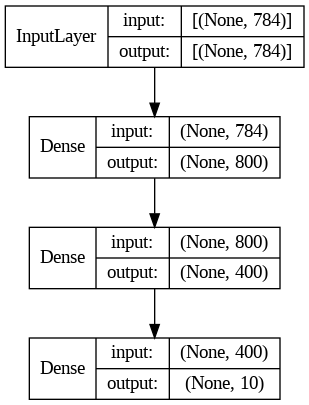

In [ ]:
utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=False)

In [ ]:
model.fit(x_train,        # обучающая выборка, входные данные
          y_train,        # обучающая выборка, выходные данные
          batch_size=128, # кол-во примеров, которое обрабатывает нейронка перед одним изменением весов
          epochs=15,      # количество эпох, когда нейронка обучается на всех примерах выборки
          verbose=1)      # 0 - не визуализировать ход обучения, 1 - визуализировать

Epoch 1/15
469/469 [==============================] - 2s 3ms/step - loss: 0.2098 - accuracy: 0.9372
Epoch 2/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0749 - accuracy: 0.9766
Epoch 3/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0494 - accuracy: 0.9846
Epoch 4/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0333 - accuracy: 0.9888
Epoch 5/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0235 - accuracy: 0.9923
Epoch 6/15
469/469 [==============================] - 2s 3ms/step - loss: 0.0238 - accuracy: 0.9922
Epoch 7/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0180 - accuracy: 0.9941
Epoch 8/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0127 - accuracy: 0.9959
Epoch 9/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0181 - accuracy: 0.9941
Epoch 10/15
469/469 [==============================] - 1s 3ms/step - loss: 0.0120 - accuracy: 0.9959

Только что вы наблюдали процесс обучения нейронной сети на 15 эпохах. После каждого цикла обучения вы можете видеть среднее значение ошибки. Обратите внимание, что практически каждую эпоху значение метрики точности (**accuracy**) увеличивается. Это означает, что ваша нейронная сеть с каждым разом делает все более точное распознавание!

Теперь сохраните веса вашей модели, чтобы потом можно было снова их использовать:


In [ ]:
model.save_weights('model.h5')
model.load_weights('model.h5')

Метод `.save_weights()` сохранит веса вашей модели в хранилище, а метод `.load_weights()` загрузит их обратно.


## Распознавание рукописных цифр

Ура! Вы научили нейронную сеть распознавать цифры на картинках с огромной точностью – более **99**%.

Теперь вы можете использовать модель по прямому назначению. Выведите на экран какой-нибудь образец из тестового набора данных:


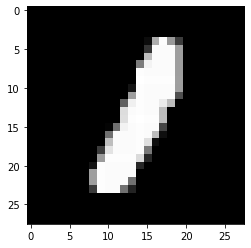

In [ ]:
# Номер тестовой цифры, которую будем распознавать
n_rec = np.random.randint(x_test_org.shape[0])

# Отображение картинки из тестового набора под номером n_rec
plt.imshow(x_test_org[n_rec], cmap='gray')
plt.show()

Теперь сохраните в переменную **x** эту картинку в виде набора из **784** чисел. 

Это нужно для того, чтобы нейросеть сделала ***предсказание***, ведь она обучалась работать именно с такими последовательностями чисел:


In [ ]:
# Выбор нужной картинки из тестовой выборки
x = x_test[n_rec]

# Проверка формы данных
print(x.shape)

(784,)


In [ ]:
# Добавление одной оси в начале, чтобы нейронка могла распознать пример
# Массив из одного примера, так как нейронка принимает именно массивы примеров (батчи) для распознавания
x = np.expand_dims(x, axis=0)

# Проверка формы данных
print(x.shape)

(1, 784)


Чтобы ваша сеть сделала предсказание, нужно вызвать метод `.predict()` и передать в него данные для распознавания:


In [ ]:
len(x)

1

In [ ]:
# Распознавание примера
prediction = model.predict(x) 

1/1 [==============================] - 0s 14ms/step


Ответом вашей нейронной сети будет такой массив чисел:


In [ ]:
# Вывод результата - вектор из 10 чисел
print(prediction)

[[2.2208978e-08 9.9999917e-01 1.4398588e-11 2.2192102e-10 3.5798433e-08
  4.8690475e-11 3.2786902e-11 5.2759801e-09 7.9817926e-07 3.5803605e-09]]


Эти числа характеризуют вероятности принадлежности к конкретному классу. Самое первое число в этой последовательности отвечает на вопрос, какова вероятность, что на картинке изображена цифра **0**. Второе число говорит то же самое про цифру **1**. Сумма всех вероятностей равна единице, то есть предполагатся полный набор событий (только цифры от **0** до **9** и ничего другого):

In [ ]:
sum(prediction[0])

1.0000000308957788

Таким образом, индекс самой большой вероятности в этом списке чисел и будет ответом вашей нейронной сети:

In [ ]:
# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred = np.argmax(prediction)
print(f'Распознана цифра: {pred}')

Распознана цифра: 1


Как видите, ваша сеть находит правильный ответ для картинки с изображением цифры 6.

In [ ]:
import keras.utils as image

In [ ]:
from pathlib import Path
Path.cwd()

PosixPath('/content')

In [ ]:
img = image.load_img('/Number_2.jpg', target_size=(28, 28))
img

In [ ]:
from PIL import Image, ImageOps
# Load the image
#image = Image.open("input_image.png")

# Convert the image to grayscale
grayscale_image = img.convert("L")

# Save the grayscale image
grayscale_image.save("grayscale_image.png")

grayscale_image

In [ ]:
inverted_image = ImageOps.invert(grayscale_image)
inverted_image

In [ ]:
inverted_image_ar = image.img_to_array(img) 

In [ ]:
inverted_image_ar.shape

(28, 28, 3)

In [ ]:
image_2d = inverted_image_ar[:, :, 0]

In [ ]:
image_1d = image_2d.reshape(784,)

In [ ]:
image_1d.shape

(784,)

In [ ]:
# Добавление одной оси в начале, чтобы нейронка могла распознать пример
# Массив из одного примера, так как нейронка принимает именно массивы примеров (батчи) для распознавания
image_1d_for_test = np.expand_dims(image_1d, axis=0)

# Проверка формы данных
print(image_1d_for_test.shape)

(1, 784)


In [ ]:
prediction = model.predict(image_1d_for_test)
print(prediction)
pred = np.argmax(prediction)
print(f'Распознана цифра: {pred}')

1/1 [==============================] - 0s 15ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Распознана цифра: 5
